In [92]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [93]:
# Load dataset
dataset = pd.read_csv("house_prices_train.csv")

In [94]:
# Identify categorical and numerical columns
numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
numerical_features.remove("SalePrice")  # Exclude target variable
print("Numerical Features: ",numerical_features)
print("Categorical Features", categorical_features)

Numerical Features:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Categorical Features ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garag

In [95]:
# Define transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
# Combine transformers in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [97]:
# Handle missing values
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)
dataset.fillna("None", inplace=True)

In [98]:
# Encode categorical variables
dataset = pd.get_dummies(dataset, drop_first=True)

In [99]:
# Split data into train and test sets
X = dataset.drop("SalePrice", axis=1)
y = dataset["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

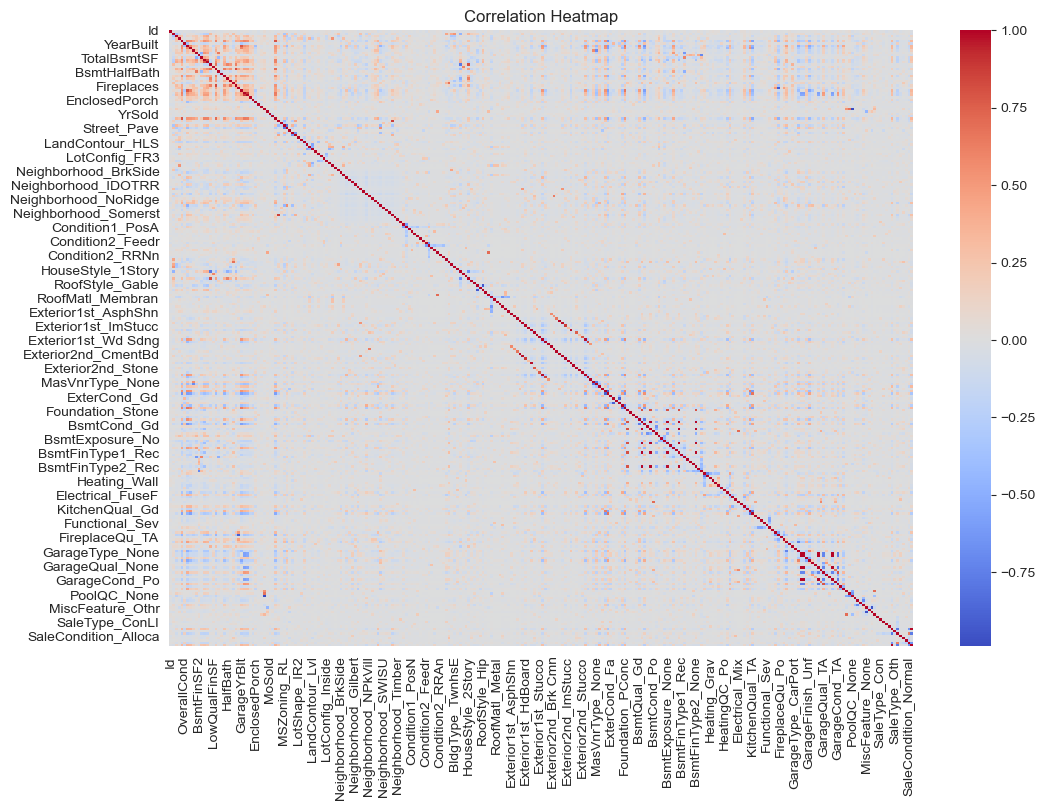

In [100]:
# Exploratory Data Analysis
# Correlation Heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [101]:
raw_data = pd.read_csv("house_prices_train.csv")
dataset["Neighborhood"] = raw_data["Neighborhood"]

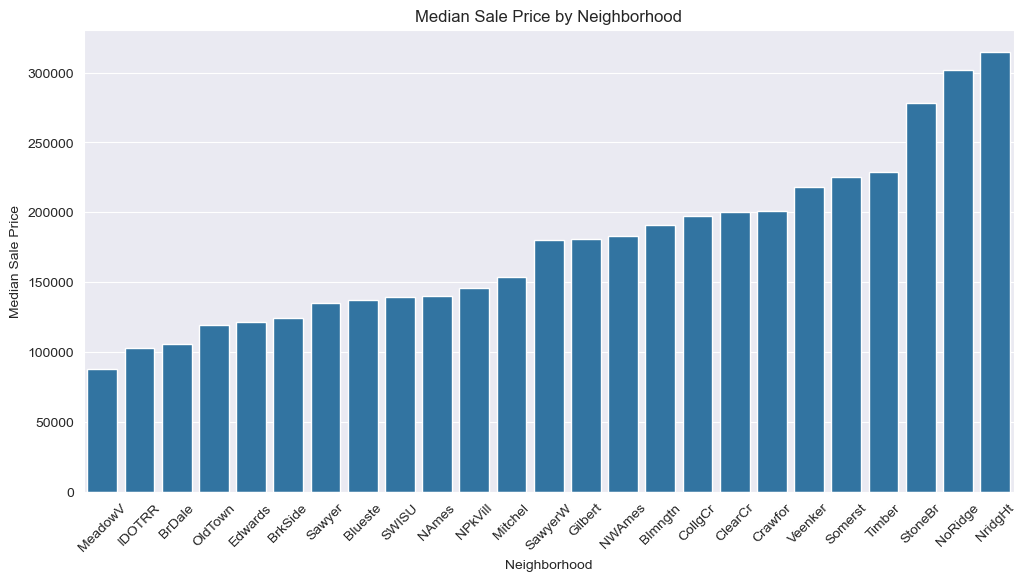

In [102]:
neighborhood_prices = raw_data.groupby("Neighborhood")["SalePrice"].median().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_prices.index, y=neighborhood_prices.values)
plt.xticks(rotation=45)
plt.title("Median Sale Price by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Median Sale Price")
plt.show()

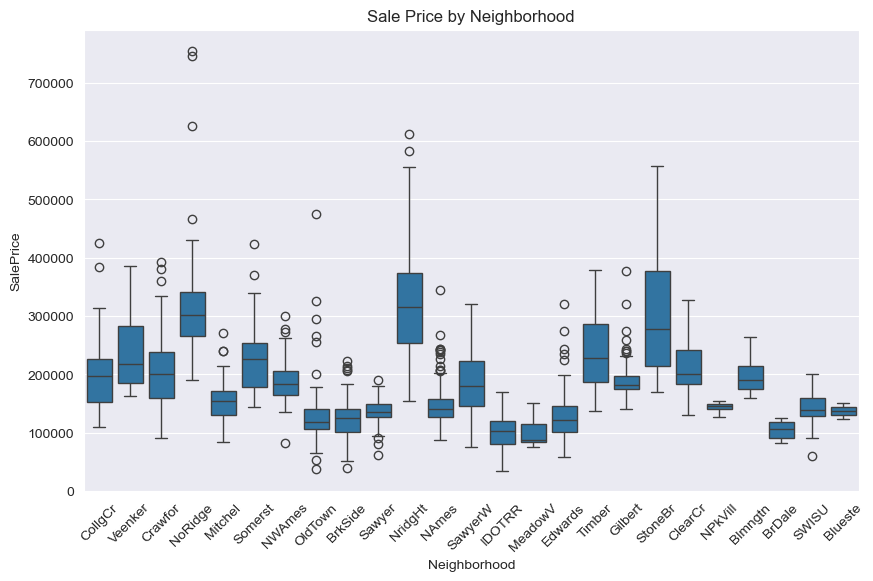

In [103]:
# Boxplot for Neighborhood (assuming a categorical variable exists as `Neighborhood`)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=dataset)
plt.xticks(rotation=45)
plt.title("Sale Price by Neighborhood")
plt.show()

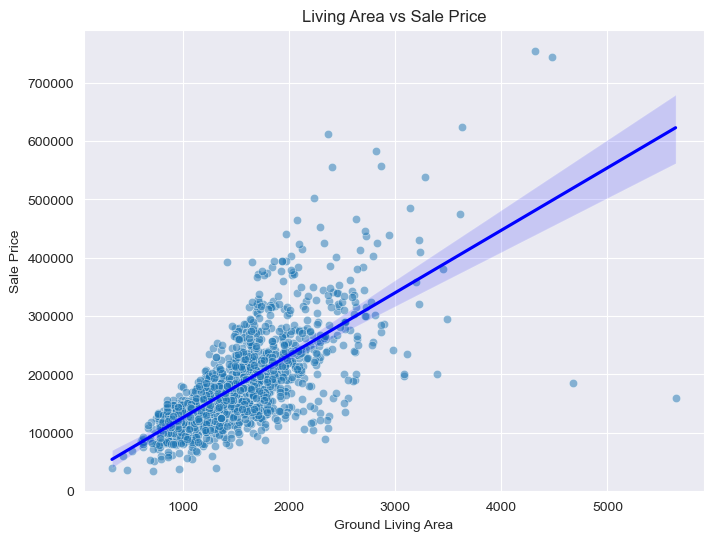

In [104]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataset["GrLivArea"], y=dataset["SalePrice"], alpha=0.5)
sns.regplot(x="GrLivArea", y="SalePrice", data=dataset, scatter=False, color="blue")
plt.title("Living Area vs Sale Price")
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.show()

In [105]:
# Model Training and Evaluation
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_predictions))
print(f"Linear Regression RMSE: {linear_rmse}")

Linear Regression RMSE: 25124.99661274925


In [106]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=123)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 26980.233400076704


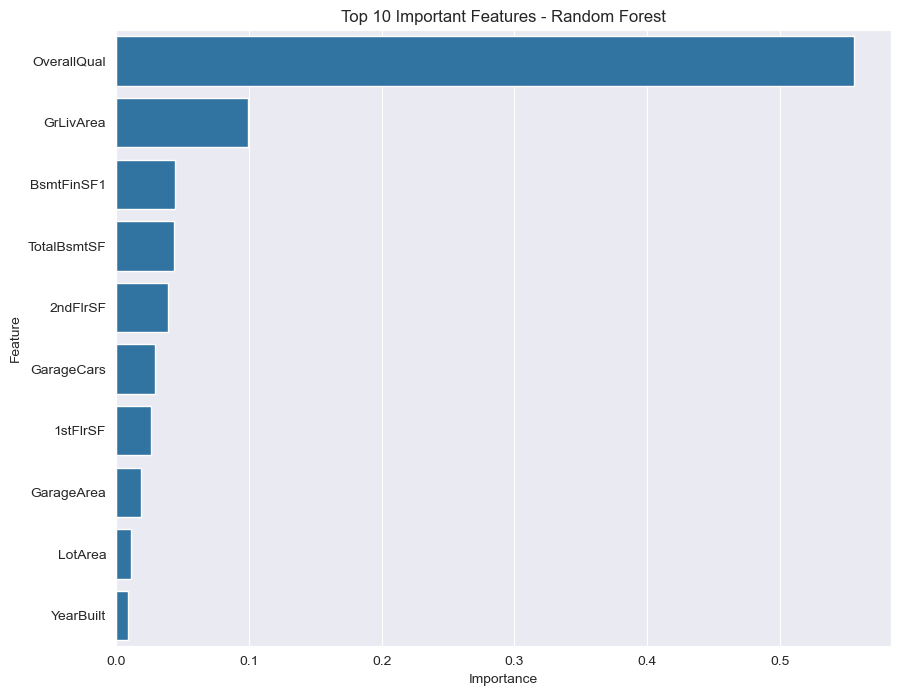

In [107]:
# Feature Importance for Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10))
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [108]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=123)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"XGBoost RMSE: {xgb_rmse}")

XGBoost RMSE: 29052.29083271819


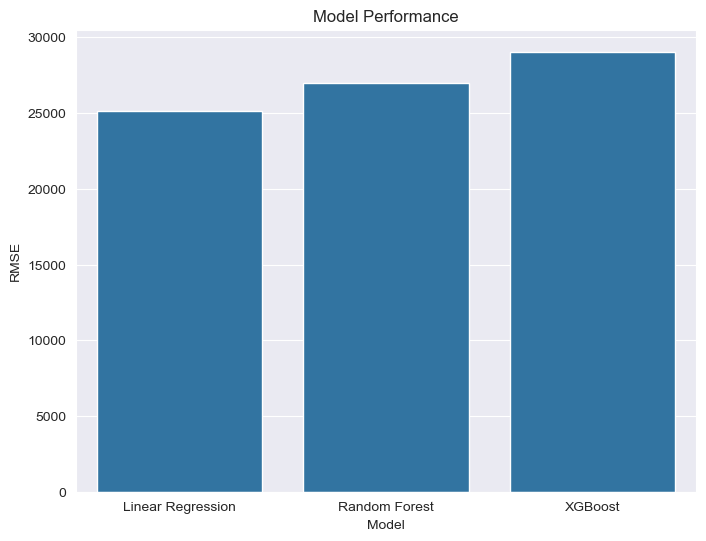

In [109]:
# Model Performance Comparison
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "RMSE": [linear_rmse, rf_rmse, xgb_rmse]
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Model", y="RMSE", data=results)
plt.title("Model Performance")
plt.show()